In [20]:
from citipy import citipy
from random import randint
import openweathermapy.core as owm
from config import api_key
import matplotlib as plt
import datetime
now = datetime.datetime.now()
date = str(now)[:10]



In [21]:
def newpoint():
   return randint(-180,180), randint(-90, 90)

coordinates =[]

points = (newpoint() for x in range(20))
for point in points:
   #print (point)
   coordinates.append(point)
print (date)

2018-04-04


In [3]:
cities = []
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    cities.append(citipy.nearest_city(lat, lon))


In [4]:
city_names = []

for city in cities:
    country_code = city.country_code
    name = city.city_name
    city_names.append(name)
    #print(f"The country code of {name} is '{country_code}'.")

In [5]:
settings = {"units": "Imperial","APPID" : api_key}

counter = 0
citypy_list = []
for a in city_names:
    try:
        data = owm.get_current(a, **settings)
        citypy_list.append(data)
        print (f"Data for {data['name']} is being processed and its City ID is {data['id']}")
    except:
        counter += 1

print (counter)

Data for Aras is being processed and its City ID is 69559
Data for Ushuaia is being processed and its City ID is 3833367
Data for Bredasdorp is being processed and its City ID is 1015776
Data for Qaanaaq is being processed and its City ID is 3831208
Data for Port-Cartier is being processed and its City ID is 6111696
Data for Eenhana is being processed and its City ID is 3357804
Data for Longyearbyen is being processed and its City ID is 2729907
Data for Port Alfred is being processed and its City ID is 964432
Data for Qaanaaq is being processed and its City ID is 3831208
Data for Castro is being processed and its City ID is 3896218
Data for Shakiso is being processed and its City ID is 328716
Data for Ushuaia is being processed and its City ID is 3833367
Data for Longyearbyen is being processed and its City ID is 2729907
Data for Ushuaia is being processed and its City ID is 3833367
Data for Ushuaia is being processed and its City ID is 3833367
Data for Port Alfred is being processed a

In [6]:
print (len(citypy_list))

20


In [7]:
import pprint
pprint.pprint (citypy_list[2])

{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': -34.53, 'lon': 20.04},
 'dt': 1522868400,
 'id': 1015776,
 'main': {'humidity': 82,
          'pressure': 1013,
          'temp': 68,
          'temp_max': 68,
          'temp_min': 68},
 'name': 'Bredasdorp',
 'rain': {'3h': 0.195},
 'sys': {'country': 'ZA',
         'id': 6591,
         'message': 0.0037,
         'sunrise': 1522817708,
         'sunset': 1522859372,
         'type': 1},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 130, 'speed': 1.12}}


In [8]:
import pandas as pd

latitude = []
humidity = []
wind_speed = []
temperature = []
City_name = []
City_Country = []
Cloudiness = []
City_id = []
date = []

# Temperature (F) vs. Latitude
# Humidity (%) vs. Latitude
# Cloudiness (%) vs. Latitude
# Wind Speed (mph) vs. Latitude

for a in citypy_list:
    latitude.append(a['coord']['lat'])
    humidity.append(a['main']['humidity'])
    wind_speed.append(a['wind']['speed'])
    temperature.append(a['main']['temp'])
    City_name.append(a['name'])
    City_Country.append(a['sys']['country'])
    Cloudiness.append(a['clouds']['all'])
    City_id.append(a['id'])
    
b = {'Latitude' : latitude, 'City_Country' : City_Country, 'Humidity (%)' : humidity, 'Temperature' : temperature, 
     'City_name' : City_name, 'Cloudiness(%)' : Cloudiness, 'Wind_Speed' : wind_speed, 'City_id' :City_id}
#df.columns = ['City_id','latitude', 'humidity', 'wind_speed', 'temperature']

City_data_df = pd.DataFrame(b)

City_data_df.head()

,City_Country,City_id,City_name,Cloudiness(%),Humidity (%),Latitude,Temperature,Wind_Speed
0,YE,69559,Aras,12,85,14.28,46.65,2.39
1,AR,3833367,Ushuaia,75,70,-54.81,45.63,5.82
2,ZA,1015776,Bredasdorp,76,82,-34.53,68.00,1.12
3,GL,3831208,Qaanaaq,0,88,77.48,-6.82,10.78
4,CA,6111696,Port-Cartier,90,72,50.03,15.80,10.29


In [9]:
City_data_df.to_csv("City_data_output.csv")

In [25]:
print (owm.BASE_URL)

http://api.openweathermap.org/data/2.5/


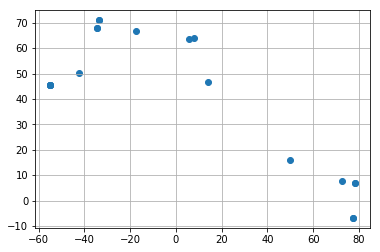

In [26]:
import matplotlib.pyplot as plt
plt.scatter(latitude, temperature)
plt.grid()
plt.show()

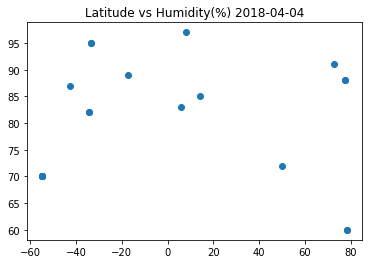

In [31]:
plt.scatter(latitude, humidity)
plt.title( "Latitude vs Humidity(%) " + str(date) )
plt.show()

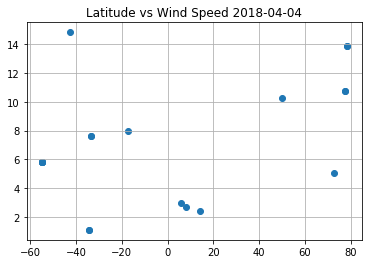

In [32]:
plt.scatter(latitude, wind_speed)
plt.title( "Latitude vs Wind Speed " + str(date) )
plt.grid()
plt.show()

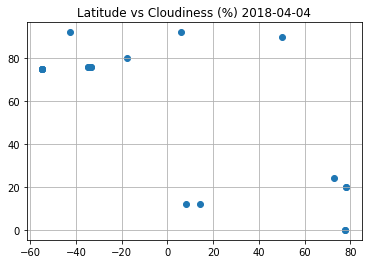

In [33]:
plt.scatter(latitude, Cloudiness)
plt.title( "Latitude vs Cloudiness (%) " + str(date) )
plt.grid()
plt.show()

In [22]:
print (date)

2018-04-04
